In [ ]:
import keras
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, MaxPool2D
from tensorflow.keras.utils import to_categorical
from keras.preprocessing import image
from tensorflow.keras import datasets, layers, models, losses
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tqdm import tqdm
%matplotlib inline

In [ ]:
print("Choose dataset")
opt = int(input("Enter 1 for Messidor Dataset \nEnter 2 for Augmented Messidor dataset\n"))
global train_label_path,train_data_path,test_label_path,test_data_path


if opt==1:
  train_label_path = '/content/drive/MyDrive/Mtech Project/Dataset/Messidor/train.csv'
  train_data_path = '../content/drive/MyDrive/Mtech Project/Dataset/Messidor/train/'
  test_label_path = '/content/drive/MyDrive/Mtech Project/Dataset/Messidor/test.csv'
  test_data_path = '../content/drive/MyDrive/Mtech Project/Dataset/Messidor/test/'
elif opt==2:
  train_label_path = '/content/drive/MyDrive/Mtech Project/Dataset/Augmented Messidor*5/aug_train_label.csv'
  train_data_path = '../content/drive/MyDrive/Mtech Project/Dataset/Augmented Messidor*5/aug_train/'
  test_label_path = '/content/drive/MyDrive/Mtech Project/Dataset/Augmented Messidor*5/test.csv'
  test_data_path = '../content/drive/MyDrive/Mtech Project/Dataset/Augmented Messidor*5/test/'

Choose dataset
Enter 1 for Messidor Dataset 
Enter 2 for Augmented Messidor dataset1


In [ ]:
# reading the labels of training data
train_set = pd.read_csv(train_label_path)    # reading the csv file
train_image = []

#loading training data using the labels
for i in tqdm(range(train_set.shape[0])):
    img = image.load_img(train_data_path + train_set['Image'][i],target_size=(224,224,3))
    img = image.img_to_array(img)
    img = img/255
    train_image.append(img)

X = np.array(train_image)

# reading the labels of testing data            
test_set =  pd.read_csv(test_label_path)    # reading the csv file
test_image = []

#loading testing data using the labels
for i in tqdm(range(test_set.shape[0])):
    img = image.load_img(test_data_path + test_set['Image'][i],target_size=(224,224,3))
    img = image.img_to_array(img)
    img = img/255
    test_image.append(img)

Y = np.array(test_image)

100%|██████████| 240/240 [02:01<00:00,  1.98it/s]


In [ ]:
y = np.array(train_set.drop(['Image', 'Risk of macular edema '],axis=1))
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.1)

In [ ]:
def baseline_model(input_model):
  global base_model
  if input_model == '1':
    vgg16_model = tf.keras.applications.VGG16(include_top=True,weights="imagenet",input_tensor=None,
              input_shape=(224,224,3),pooling=None,classes=1000,classifier_activation="softmax",)  
    base_model = Sequential()
    for layer in vgg16_model.layers[:-1]:
        base_model.add(layer)
    for layer in base_model.layers:
      layer.trainable = False
    base_model.add(Dense(4,activation = 'softmax'))

  if input_model == '2':
    vgg19_model = tf.keras.applications.VGG19(include_top=True,weights="imagenet",
              input_shape=(224,224,3),classes=1000,classifier_activation="softmax",)
    base_model = Sequential()
    for layer in vgg16_model.layers[:-1]:
        base_model.add(layer)
    for layer in base_model.layers:
      layer.trainable = False
    base_model.add(Dense(4,activation = 'softmax'))
  
  if input_model == '3':
    resNet50_model= tf.keras.applications.ResNet50(include_top=False,
                   input_shape=(224,224,3),
                   pooling='avg',classes=4,
                   weights='imagenet',)
    
    base_model = Sequential()
    for layer in resNet50_model.layers:
        layer.trainable=False
    base_model.add(Flatten())
    base_model.add(Dense(512, activation='relu'))
    base_model.add(Dense(4, activation='softmax'))

  if input_model == '4':  
    inceptionV3_model= tf.keras.applications.InceptionV3(
                        include_top=False,
                        weights="imagenet",
                        input_tensor=None,
                        input_shape=None,
                        pooling=None,
                        classes=1000,
                        classifier_activation="softmax",
                    )
    inceptionV3_model.trainable = False
    base_model = models.Sequential()
    base_model.add(inceptionV3_model)
    base_model.add(GlobalAvgPool2D())
    base_model.add(Dense(units=4,activation='softmax'))

  if input_model == '5':
    mobileNet_model= tf.keras.applications.MobileNet(
          input_shape=None,
          alpha=1.0,
          depth_multiplier=1,
          dropout=0.001,
          include_top=True,
          weights="imagenet",
          input_tensor=None,
          pooling=None,
          classes=1000,
          classifier_activation="softmax",
      )
    base_model = Sequential()
    for layer in mobileNet_model.layers[:-1]:
        base_model.add(layer)

    for layer in base_model.layers:
      layer.trainable = False
    base_model.add(Dense(4,activation = 'softmax'))

  if input_model == '6':
    xception_model = tf.keras.applications.Xception(
                  include_top=False,
                  weights="imagenet",
                  input_tensor=None,
                  input_shape=(224,224,3),
                  pooling=None,
                  classes=4,
                  classifier_activation="softmax",
              )
    
    xception_model.trainable = False
    base_model = models.Sequential()
    base_model.add(xception_model)


    base_model.add(GlobalAvgPool2D())
    base_model.add(Dense(units=4,activation='softmax'))

  if input_model == '7':
    densenet121_model= tf.keras.applications.DenseNet121(include_top=False,
                      input_shape=(224,224,3),
                      pooling='avg',
                      weights='imagenet')

    for layer in densenet121_model.layers:
            layer.trainable=False

    #performing fine tuning       
    base_model = Sequential()
    base_model.add(densenet121_model)
    base_model.add(Flatten())
    base_model.add(Dense(512, activation='relu'))
    base_model.add(Dense(4, activation='softmax'))
    
  return base_model

In [ ]:
print('SELECT A MODEL')
print('Enter 1 for VGG16')
print('Enter 2 for VGG19')
print('Enter 3 for ResNet50')
print('Enter 4 for InceptionV3')
print('Enter 5 for MobileNet')
print('Enter 6 for Xception')
print('Enter 7 for DenseNet121')

choice_model = input('Enter preferred model: ')
baseline_model = baseline_model(choice_model)

SELECT A MODEL
Enter 1 for VGG16
Enter 2 for VGG19
Enter 3 for ResNet50
Enter 4 for InceptionV3
Enter 5 for MobileNet
Enter 6 for Xception
Enter 7 for DenseNet121
Enter preferred model: 7


In [ ]:
baseline_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
densenet121 (Functional)     (None, 1024)              7037504   
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               524800    
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 2052      
Total params: 7,564,356
Trainable params: 526,852
Non-trainable params: 7,037,504
_________________________________________________________________


In [ ]:
baseline_model.compile(optimizer='adam', loss=losses.sparse_categorical_crossentropy, metrics=['accuracy'])

#training
history = baseline_model.fit(X_train, y_train,
          batch_size=4,
          epochs=15,
          verbose=1,
          validation_data=(X_test, y_test))

Epoch 1/15
216/216 [==============================] - 179s 800ms/step - loss: 1.4726 - accuracy: 0.4329 - val_loss: 1.1541 - val_accuracy: 0.5104
Epoch 2/15
216/216 [==============================] - 179s 831ms/step - loss: 1.1605 - accuracy: 0.5266 - val_loss: 1.0993 - val_accuracy: 0.5417
Epoch 3/15
216/216 [==============================] - 184s 854ms/step - loss: 1.1271 - accuracy: 0.5266 - val_loss: 1.0598 - val_accuracy: 0.5833
Epoch 4/15
216/216 [==============================] - 185s 856ms/step - loss: 1.0746 - accuracy: 0.5648 - val_loss: 1.0157 - val_accuracy: 0.5625
Epoch 5/15
216/216 [==============================] - 180s 834ms/step - loss: 1.0298 - accuracy: 0.5822 - val_loss: 1.0175 - val_accuracy: 0.5521
Epoch 6/15
216/216 [==============================] - 176s 814ms/step - loss: 1.0625 - accuracy: 0.5556 - val_loss: 1.0575 - val_accuracy: 0.5729
Epoch 7/15
216/216 [==============================] - 164s 761ms/step - loss: 1.0110 - accuracy: 0.5926 - val_loss: 1.0828 -

Hyperparameters : {'name': 'Adam', 'learning_rate': 0.001, 'decay': 0.0, 'beta_1': 0.9, 'beta_2': 0.999, 'epsilon': 1e-07, 'amsgrad': False} 

Test loss: 1.0099838972091675
Test accuracy: 0.59375




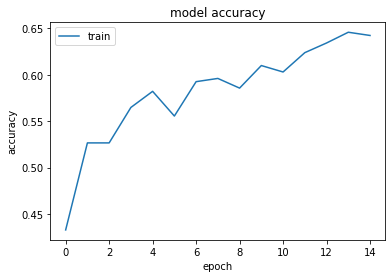

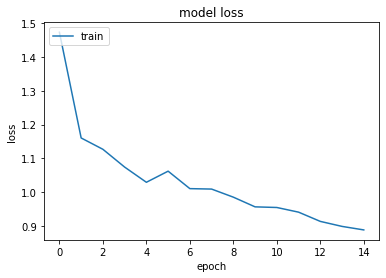

In [ ]:
#Calculating accuracy and loss of the model w.r.t test dataset
score = baseline_model.evaluate(X_test, y_test, verbose=0)
print("Hyperparameters : {} \n".format(baseline_model.optimizer.get_config()))
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print('\n')

#Plotting the graph of accuracy VS epoch
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'],loc='upper left')
plt.show()

print('\n')
#Plotting the graph of loss VS epoch
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'],loc='upper left')
plt.show()